In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model

# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Assign the station class to a variable called `Station` and the measurement class to a variable called 'Measurement'
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date)

('2017-08-23',)


('2016-08-23',)


<ipython-input-113-e200a9df23fc>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


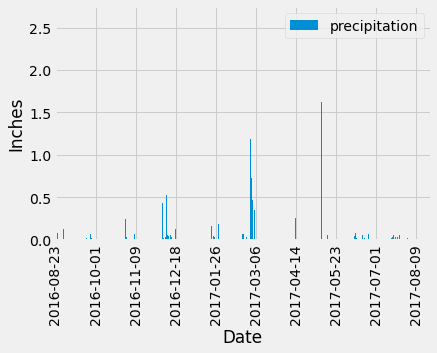

In [113]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
x = 0
for row in session.query(Measurement.date).distinct(Measurement.date).order_by(Measurement.date.desc()).limit(366):
    x = x + 1
    if x == 366:
        one_year_from_latest_date = row

print(one_year_from_latest_date)

# Perform a query to retrieve the data and precipitation scores
prcp_scores_df = pd.read_sql(session.query(Measurement).\
                             group_by(Measurement.date).\
                             filter(Measurement.date.between('2016-08-23', '2017-08-23')).statement, session.bind)

subset_prcp_scores_df = prcp_scores_df[["date", "prcp"]]

# Save the query results as a Pandas DataFrame and set the index to the date column
subset_prcp_scores_df.set_index('date')

# Sort the dataframe by date
subset_prcp_scores_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
n = 39
ax = subset_prcp_scores_df.plot.bar(x='date', y='prcp')
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

ax.legend(["precipitation"])

plt.xlabel('Date')
plt.ylabel('Inches')

ax.figure.show()

In [115]:
# Use Pandas to calcualte the summary statistics for the precipitation data
subset_prcp_scores_df.describe()

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [122]:
# Design a query to calculate the total number stations in the dataset
num_of_stations = session.query(func.count(Measurement.station.distinct())).all()
print(num_of_stations)

[(9,)]


In [131]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                            group_by(Measurement.station).\
                            order_by(Measurement.station.desc()).all()                                                                 
print(most_active_stations)    

[('USC00519523', 2669), ('USC00519397', 2724), ('USC00519281', 2772), ('USC00518838', 511), ('USC00517948', 1372), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00513117', 2709), ('USC00511918', 1979)]


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()